Data Preprocessing and Understanding

In [2]:
import pandas as pd

# Load the dataset
data_path = r"C:\Users\HP\Downloads\archive (7)\diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(data_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Data Exploration

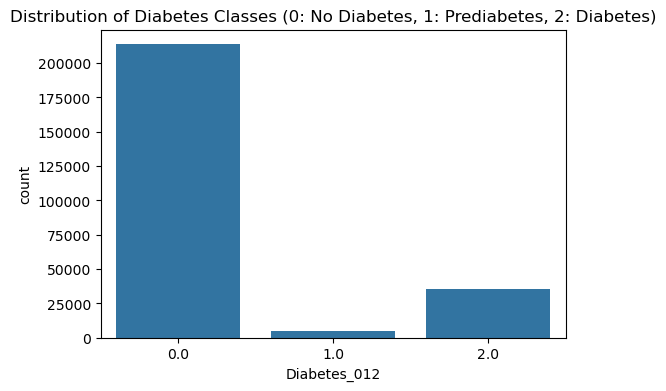

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=df)
plt.title("Distribution of Diabetes Classes (0: No Diabetes, 1: Prediabetes, 2: Diabetes)")
plt.show()


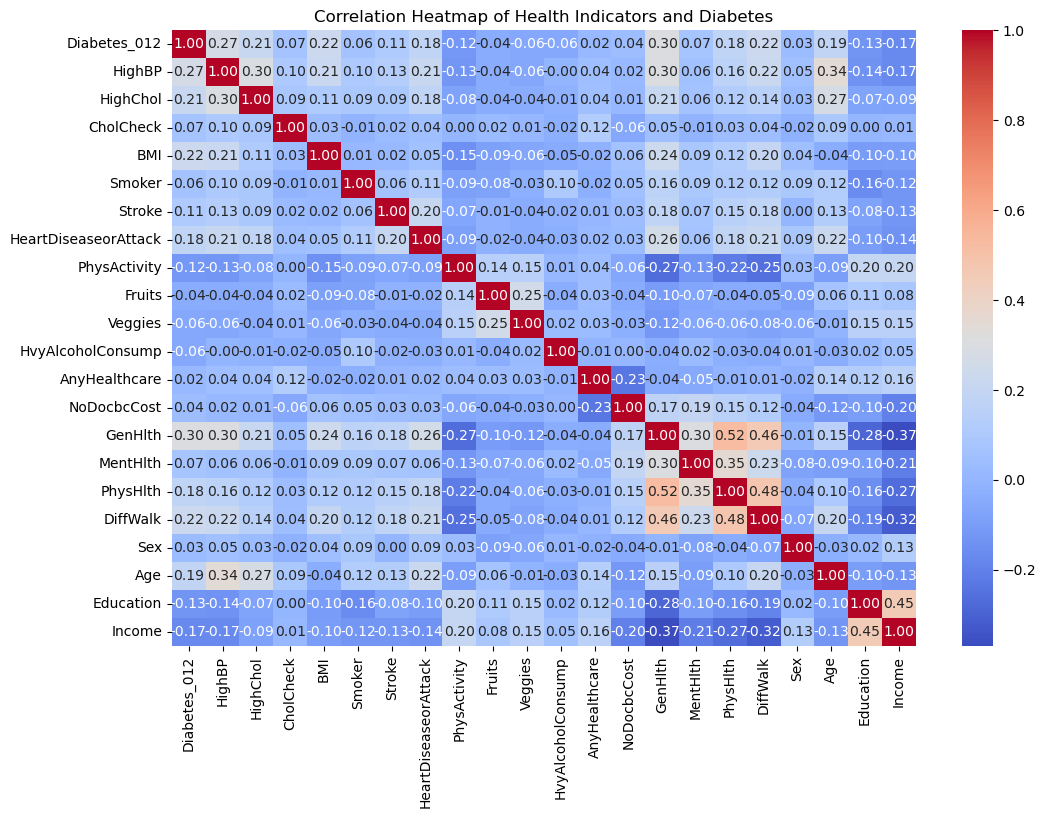

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Health Indicators and Diabetes")
plt.show()

Feature Engineering and Scaling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature and target variables
X = df.drop(columns=['Diabetes_012'], axis=1)  # 'Diabetes_012' is the target column
y = df['Diabetes_012']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the training and test sets
print(f"Training set shape: {X_train_scaled.shape}, Test set shape: {X_test_scaled.shape}")


Training set shape: (202944, 21), Test set shape: (50736, 21)


Model Building with TensorFlow

In [11]:
import tensorflow as tf

# Build the Neural Network Model using TensorFlow and Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer
    tf.keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(32, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)


E:\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8420 - loss: 0.4154 - val_accuracy: 0.8499 - val_loss: 0.3915
Epoch 2/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8506 - loss: 0.3926 - val_accuracy: 0.8506 - val_loss: 0.3906
Epoch 3/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8497 - loss: 0.3961 - val_accuracy: 0.8506 - val_loss: 0.3909
Epoch 4/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8512 - loss: 0.3906 - val_accuracy: 0.8493 - val_loss: 0.3913
Epoch 5/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8497 - loss: 0.3925 - val_accuracy: 0.8505 - val_loss: 0.3903
Epoch 6/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8494 - loss: 0.3944 - val_accuracy: 0.8502 - val_loss: 0.3908
Epoch 7/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8513 - loss: 0.3913 - val_accuracy: 0.8504 - val_loss: 0.3917
Epoch 8/20
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8505 - loss: 0

In [12]:
#  Model Evaluation for TensorFlow
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# Make predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred_tf = np.argmax(y_pred_prob, axis=1)

# Print classification report
print("Classification Report (TensorFlow):")
print(classification_report(y_test, y_pred_tf))

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8451 - loss: 0.4093
Test Accuracy: 84.51%
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Classification Report (TensorFlow):
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.50      0.22      0.30      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.39      0.41     50736
weighted avg       0.80      0.85      0.81     50736



In [13]:
# Confusion Matrix
conf_matrix_tf = confusion_matrix(y_test, y_pred_tf)
print("Confusion Matrix (TensorFlow):")
print(conf_matrix_tf)

Confusion Matrix (TensorFlow):
[[41354     3  1384]
 [  815     0   111]
 [ 5542     3  1524]]


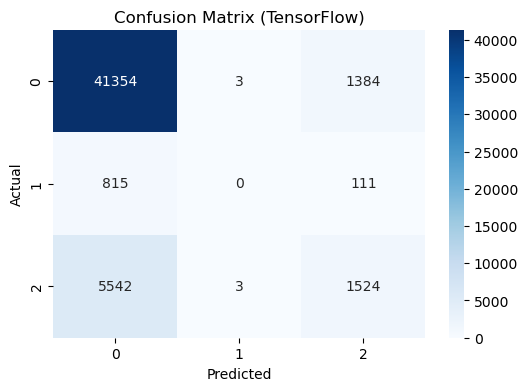

In [14]:
# Plotting the confusion matrix for TensorFlow
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_tf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (TensorFlow)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Building with XGBoost


In [16]:
!pip install xgboost

In [17]:
import xgboost as xgb

# Instantiate the XGBoost classifier without use_label_encoder
xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss')

# Fit the model
xgb_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Print classification report for XGBoost
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


Classification Report (XGBoost):
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.54      0.19      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



In [18]:
# Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost):")
print(conf_matrix_xgb)


Confusion Matrix (XGBoost):
[[41714     1  1026]
 [  828     0    98]
 [ 5724     0  1345]]


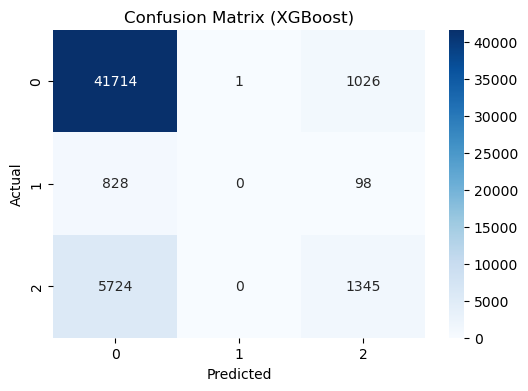

In [19]:
# Plotting the confusion matrix for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()